# Fundamentos de Linguagem Python Para Análise de Dados e Data Science
## Machine Learning com Scikit-Learn
### Problema de Negócio:
#### Usando dados históricos é possível prever o salário de alguém com base no tempo dedicado aos estudos em horas por mês?

In [96]:
from platform import python_version
print('A Versão da Linguagem Python Usada Neste Projeto e: ', python_version())
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

A Versão da Linguagem Python Usada Neste Projeto e:  3.11.5


In [81]:
# Carrega o dataset
df_dsa = pd.read_csv('dataset.csv')

In [82]:
#Verificar numero de linhas e colunas
df_dsa.shape

(500, 2)

In [83]:
# Verificar colunas
df_dsa.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [84]:
# Visualizar tabela
df_dsa.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [85]:
# Informações sobre a tabela de dados
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


## Análise Exploratória - Resumo Estatístico

In [86]:
# Verificar Valores ausentes 
df_dsa.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [87]:
# Verificar Correlação entre as variaveis 
df_dsa.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [88]:
# Resumo estatistico do DataSet
df_dsa.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [89]:
# Resumo estatístico da variável preditora
df_dsa["horas_estudo_mes"].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

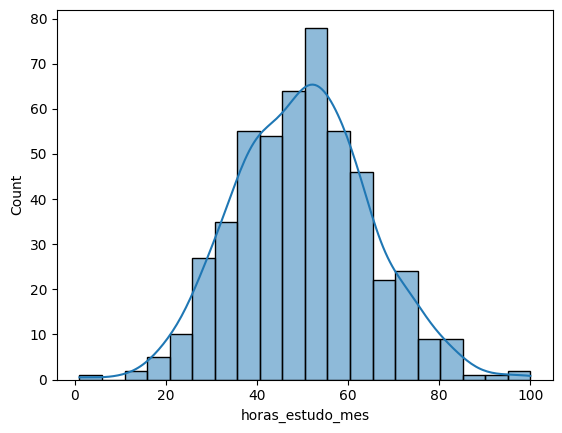

In [90]:
# Histograma da variável preditora
sns.histplot(data = df_dsa, x = "horas_estudo_mes", kde = True)

## Preparação dos Dados 

In [91]:
import numpy as np

# Preparar a variável de entrada x
x = np.array(df_dsa['horas_estudo_mes'])
x = x.reshape(-1, 1)  # Ajustar o shape de x

# Preparar a variável alvo y
y = df_dsa['salario']

# Mostrar os dados preparados
print("Variável de entrada (x):")
print(x[:5])  # Exibir as 5 primeiras linhas para verificação

print("\nVariável alvo (y):")
print(y.head())  # Exibir as 5 primeiras linhas da variável alvo

Variável de entrada (x):
[[57.]
 [48.]
 [60.]
 [73.]
 [46.]]

Variável alvo (y):
0    6813.0
1    6855.0
2    5801.0
3    7431.0
4    5475.0
Name: salario, dtype: float64


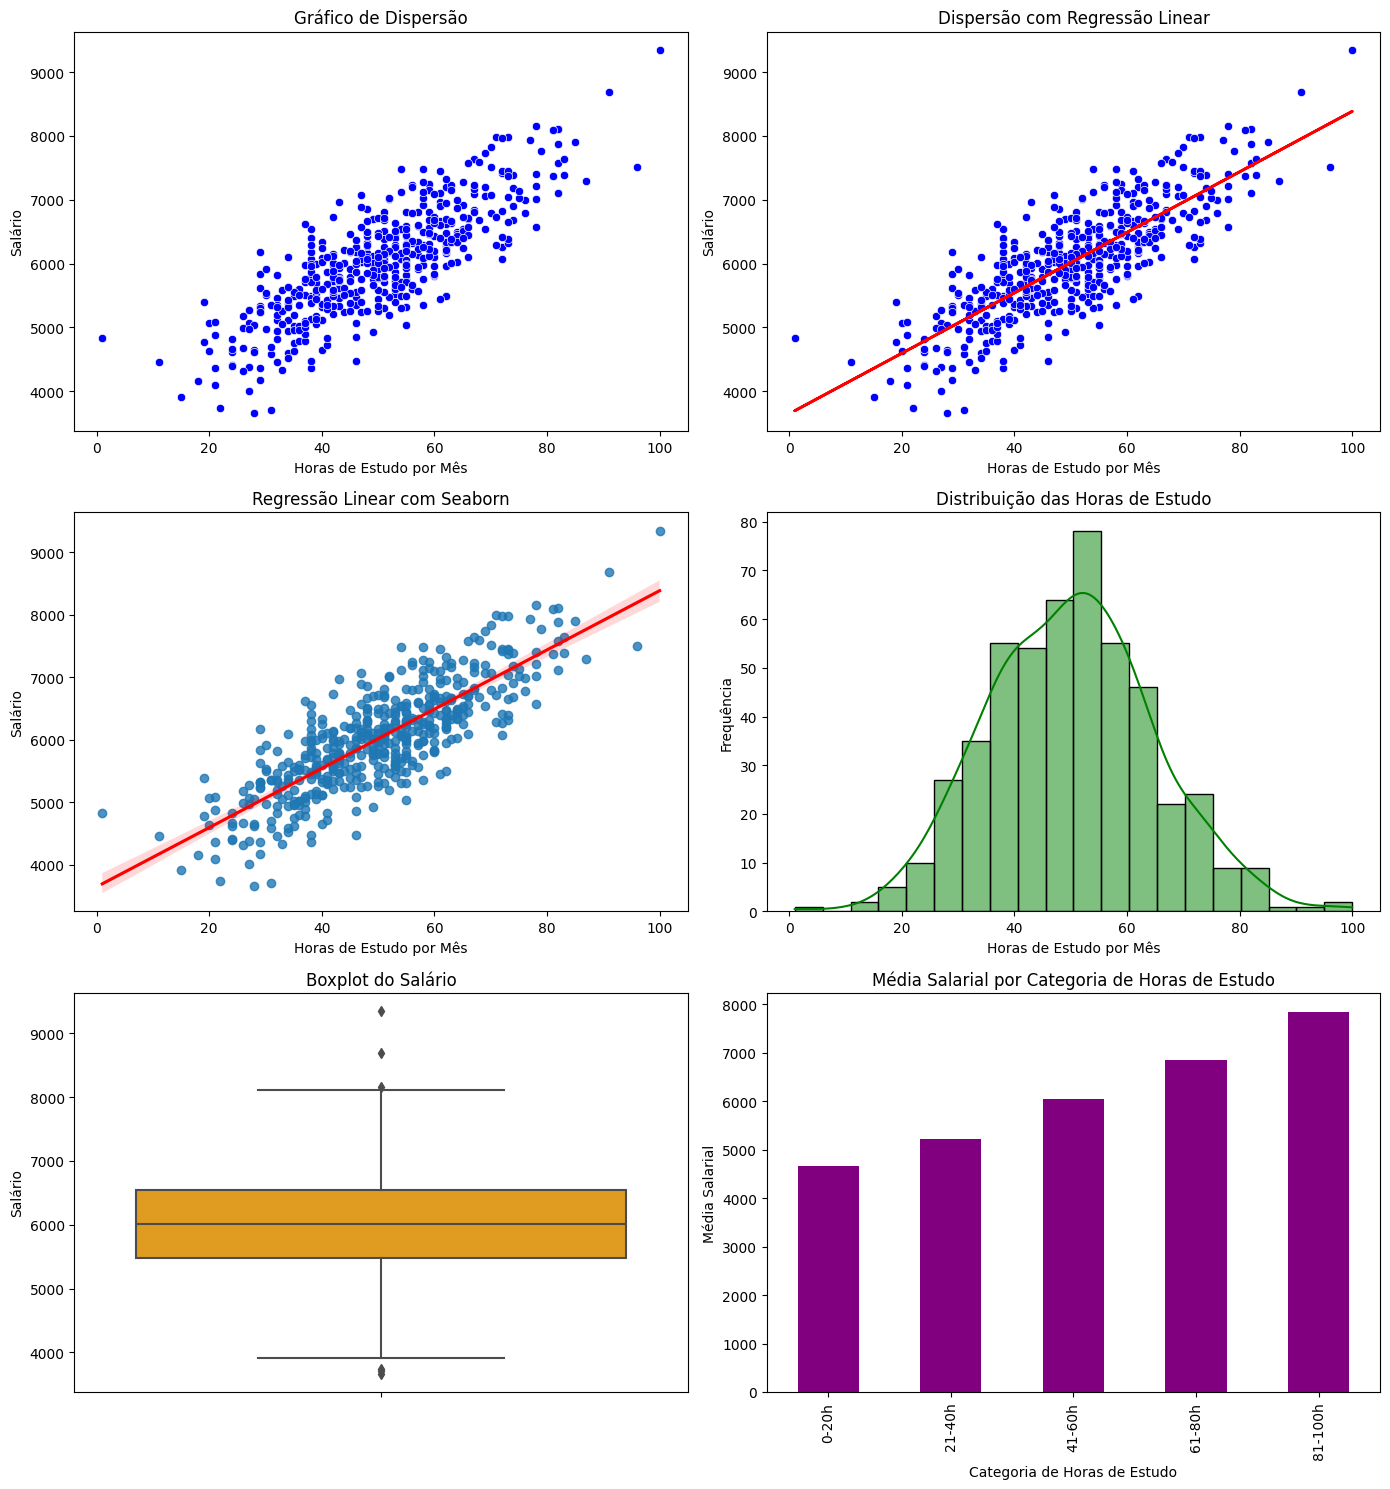

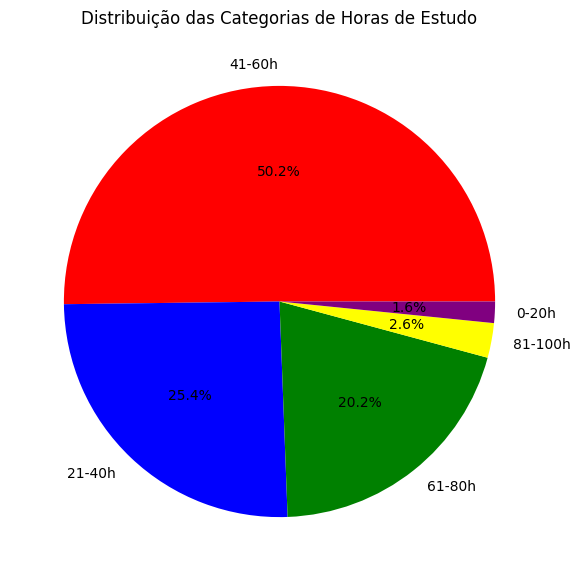

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Preparar a variável de entrada x
x = np.array(df_dsa['horas_estudo_mes']).reshape(-1, 1)

# Preparar a variável alvo y
y = df_dsa['salario']

# Ajustar um modelo de regressão linear
modelo = LinearRegression()
modelo.fit(x, y)
y_pred = modelo.predict(x)

# Criar múltiplos gráficos
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# 1. Gráfico de dispersão
sns.scatterplot(x=x.flatten(), y=y, color='blue', ax=axes[0, 0])
axes[0, 0].set_title("Gráfico de Dispersão")
axes[0, 0].set_xlabel("Horas de Estudo por Mês")
axes[0, 0].set_ylabel("Salário")

# 2. Dispersão com regressão linear
sns.scatterplot(x=x.flatten(), y=y, color='blue', ax=axes[0, 1])
axes[0, 1].plot(x, y_pred, color='red', linewidth=2)
axes[0, 1].set_title("Dispersão com Regressão Linear")
axes[0, 1].set_xlabel("Horas de Estudo por Mês")
axes[0, 1].set_ylabel("Salário")

# 3. Regplot do Seaborn (regressão com suavização)
sns.regplot(x=x.flatten(), y=y, scatter=True, line_kws={"color": "red"}, ax=axes[1, 0])
axes[1, 0].set_title("Regressão Linear com Seaborn")
axes[1, 0].set_xlabel("Horas de Estudo por Mês")
axes[1, 0].set_ylabel("Salário")

# 4. Histograma das horas de estudo
sns.histplot(df_dsa['horas_estudo_mes'], bins=20, kde=True, ax=axes[1, 1], color='green')
axes[1, 1].set_title("Distribuição das Horas de Estudo")
axes[1, 1].set_xlabel("Horas de Estudo por Mês")
axes[1, 1].set_ylabel("Frequência")

# 5. Boxplot do salário
sns.boxplot(y=df_dsa['salario'], ax=axes[2, 0], color='orange')
axes[2, 0].set_title("Boxplot do Salário")
axes[2, 0].set_ylabel("Salário")

# 6. Gráfico de barras (média salarial por categoria de horas de estudo)
df_dsa['categoria_estudo'] = pd.cut(df_dsa['horas_estudo_mes'], bins=[0, 20, 40, 60, 80, 100], 
                                    labels=['0-20h', '21-40h', '41-60h', '61-80h', '81-100h'])
media_salarial = df_dsa.groupby('categoria_estudo')['salario'].mean()

media_salarial.plot(kind='bar', color='purple', ax=axes[2, 1])
axes[2, 1].set_title("Média Salarial por Categoria de Horas de Estudo")
axes[2, 1].set_xlabel("Categoria de Horas de Estudo")
axes[2, 1].set_ylabel("Média Salarial")

plt.tight_layout()
plt.show()

# Criar gráfico de pizza da distribuição de categorias de estudo
plt.figure(figsize=(7, 7))
df_dsa['categoria_estudo'].value_counts().plot.pie(autopct='%1.1f%%', colors=['red', 'blue', 'green', 'yellow', 'purple'])
plt.title("Distribuição das Categorias de Horas de Estudo")
plt.ylabel("")  # Remover rótulo do eixo y
plt.show()

In [95]:
# Supondo que df_dsa seja seu DataFrame
# Criar X (variáveis preditoras) e y (variável alvo)
X = np.array(df_dsa['horas_estudo_mes']).reshape(-1, 1)
y = df_dsa['salario']

# Dividir os dados (80% treino, 20% teste)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibir as dimensões dos conjuntos
print(f"Tamanho do conjunto de treino (X): {X_treino.shape}")
print(f"Tamanho do conjunto de teste (X): {X_teste.shape}")
print(f"Tamanho do conjunto de treino (y): {y_treino.shape}")
print(f"Tamanho do conjunto de teste (y): {y_teste.shape}")


Tamanho do conjunto de treino (X): (400, 1)
Tamanho do conjunto de teste (X): (100, 1)
Tamanho do conjunto de treino (y): (400,)
Tamanho do conjunto de teste (y): (100,)


## Modelagem Preditiva (Machine Learning)
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [97]:
# Cria o modelo de regressão linear simples
modelo = LinearRegression()
# Treina o modelo
modelo.fit(X_treino, y_treino)

LinearRegression()

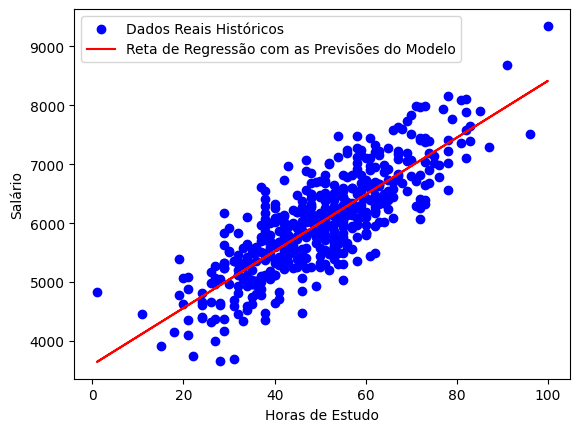

In [108]:
# Visualiza a reta de regressão linear (previsões) e os dados reais usados no treinamento
plt.scatter(X, y, color = "blue", label = "Dados Reais Históricos")
plt.plot(X, modelo.predict(X), color = "red", label = "Reta de Regressão com as Previsões do Modelo")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

Erro Absoluto Médio (MAE): 407.80
Erro Quadrático Médio (MSE): 272197.74
Raiz do Erro Quadrático Médio (RMSE): 521.73
Coeficiente de Determinação (R²): 0.5939


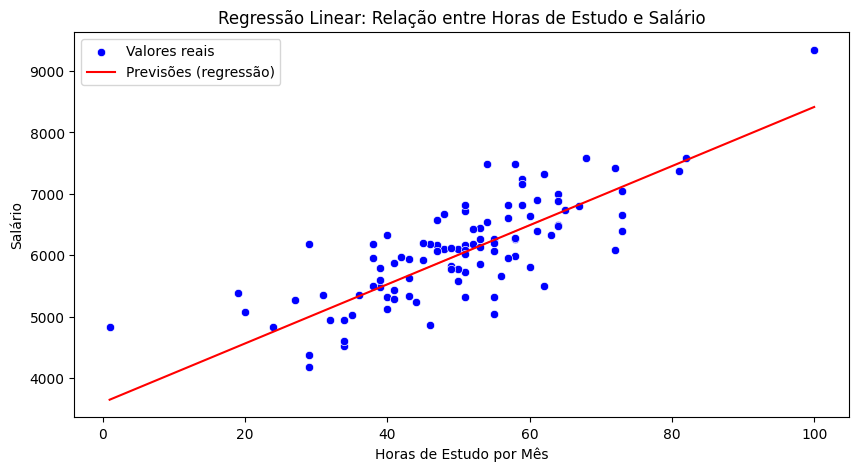

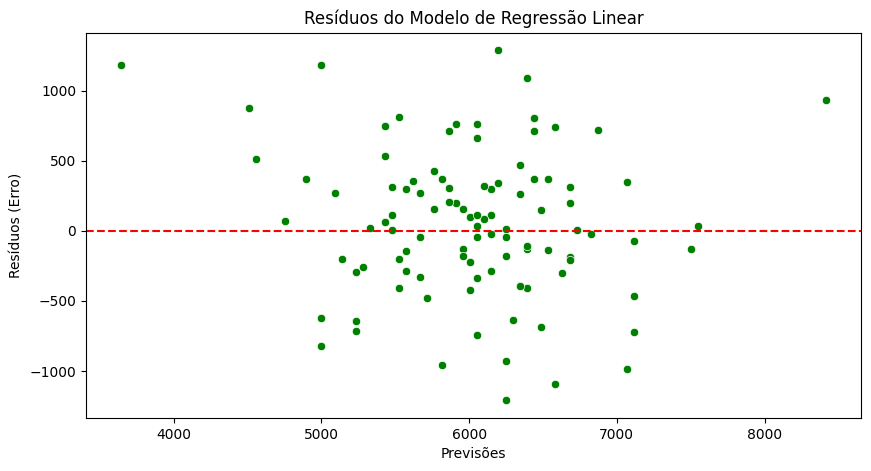

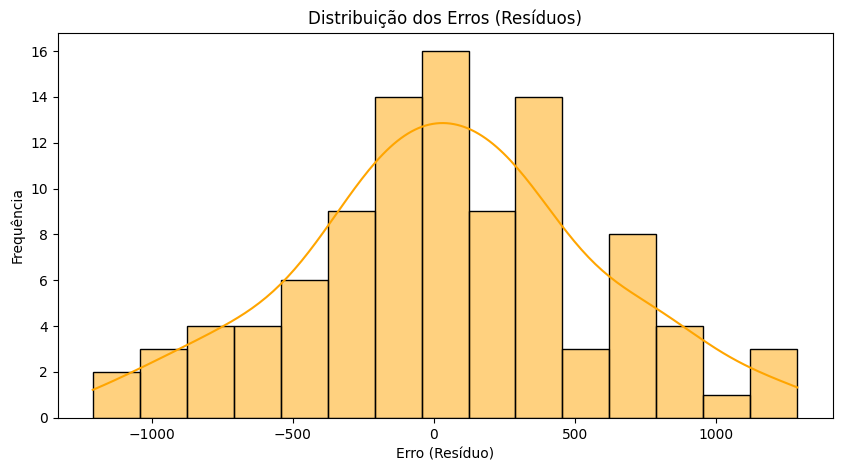

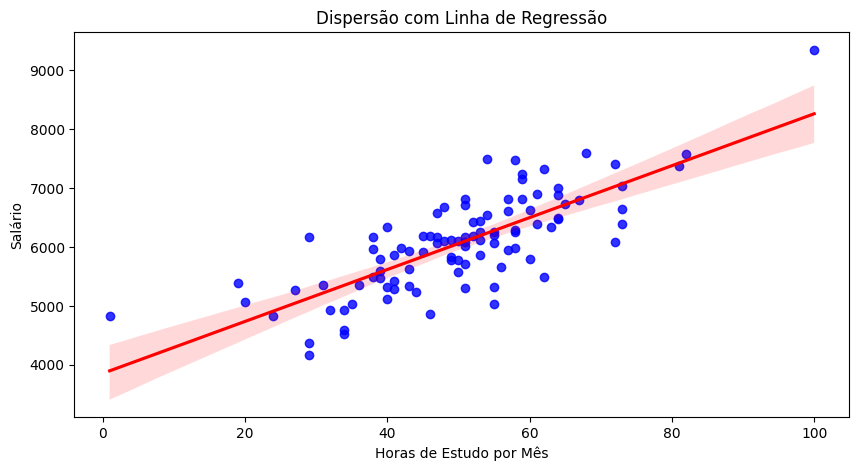

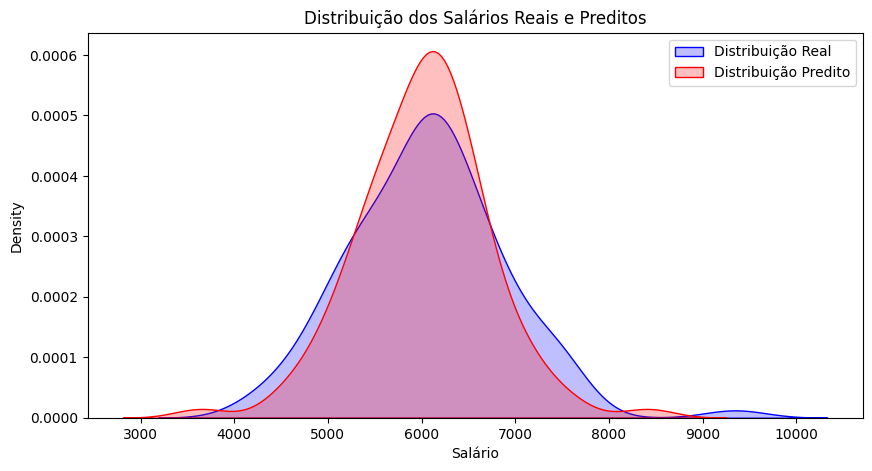

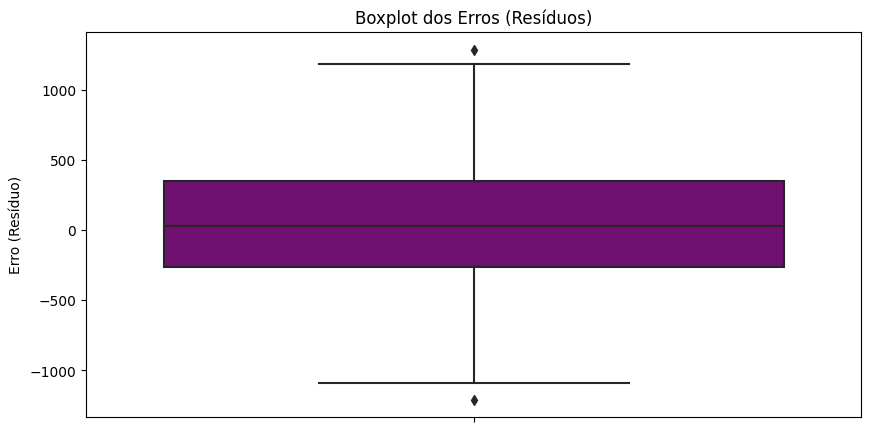

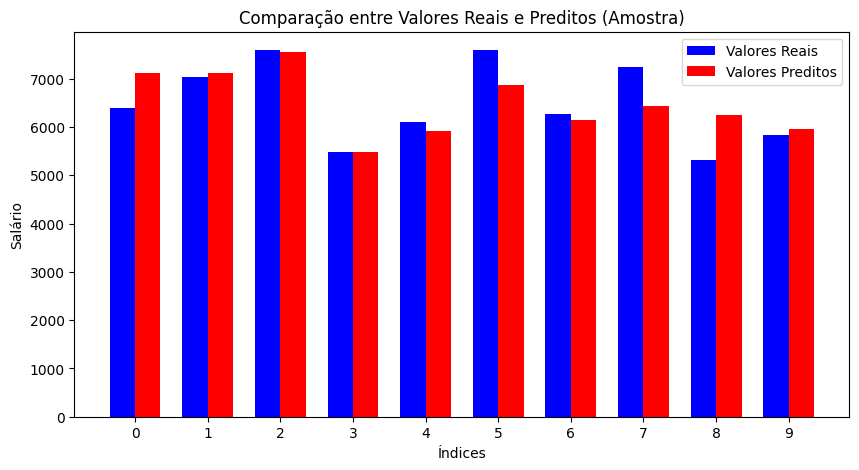

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Criar o modelo de regressão linear
modelo = LinearRegression()

# Treinar o modelo
modelo.fit(X_treino, y_treino)

# Fazer previsões no conjunto de teste
y_pred = modelo.predict(X_teste)

# Avaliação do modelo
mae = mean_absolute_error(y_teste, y_pred)
mse = mean_squared_error(y_teste, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_teste, y_pred)

# Exibir métricas de avaliação
print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")

# Gráfico de dispersão e linha de regressão
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_teste.flatten(), y=y_teste, color='blue', label="Valores reais")
sns.lineplot(x=X_teste.flatten(), y=y_pred, color='red', label="Previsões (regressão)")
plt.xlabel("Horas de Estudo por Mês")
plt.ylabel("Salário")
plt.title("Regressão Linear: Relação entre Horas de Estudo e Salário")
plt.legend()
plt.show()

# Gráfico de resíduos (diferença entre valor real e predito)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred, y=(y_teste - y_pred), color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Previsões")
plt.ylabel("Resíduos (Erro)")
plt.title("Resíduos do Modelo de Regressão Linear")
plt.show()

# Histograma dos erros/resíduos
plt.figure(figsize=(10, 5))
sns.histplot(y_teste - y_pred, kde=True, color='orange', bins=15)
plt.title("Distribuição dos Erros (Resíduos)")
plt.xlabel("Erro (Resíduo)")
plt.ylabel("Frequência")
plt.show()

# Gráfico de dispersão entre variável preditora e variável alvo com a reta de regressão
plt.figure(figsize=(10, 5))
sns.regplot(x=X_teste.flatten(), y=y_teste, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel("Horas de Estudo por Mês")
plt.ylabel("Salário")
plt.title("Dispersão com Linha de Regressão")
plt.show()

# Gráfico de distribuição dos salários reais e preditos (Comparação)
plt.figure(figsize=(10, 5))
sns.kdeplot(y_teste, color='blue', label="Distribuição Real", fill=True)
sns.kdeplot(y_pred, color='red', label="Distribuição Predito", fill=True)
plt.xlabel("Salário")
plt.title("Distribuição dos Salários Reais e Preditos")
plt.legend()
plt.show()

# Boxplot para avaliar a distribuição dos erros
plt.figure(figsize=(10, 5))
sns.boxplot(y=y_teste - y_pred, color='purple')
plt.title("Boxplot dos Erros (Resíduos)")
plt.ylabel("Erro (Resíduo)")
plt.show()

# Gráfico de barras comparando os valores reais e preditos para uma amostra
plt.figure(figsize=(10, 5))
indices = np.arange(len(y_teste[:10]))  # Mostrar os primeiros 10 valores para comparação
bar_width = 0.35
plt.bar(indices - bar_width/2, y_teste[:10], bar_width, label='Valores Reais', color='blue')
plt.bar(indices + bar_width/2, y_pred[:10], bar_width, label='Valores Preditos', color='red')
plt.xlabel("Índices")
plt.ylabel("Salário")
plt.title("Comparação entre Valores Reais e Preditos (Amostra)")
plt.xticks(indices)
plt.legend()
plt.show()


In [105]:
# Avaliar o modelo nos dados de teste usando o R²
score = modelo.score(X_teste, y_teste)
print(f"Coeficiente R^2: {score:.2f}")

# Intercepto (parâmetro w0)
intercepto = modelo.intercept_
print(f"Intercepto (w0): {intercepto:.2f}")

# Slope (parâmetro w1)
slope = modelo.coef_
print(f"Slope (w1): {slope[0]:.2f}")


Coeficiente R^2: 0.59
Intercepto (w0): 3596.78
Slope (w1): 48.18


# Deploy do Modelo
Usaremos o modelo para prever o salário com base nas horas de estudo.

In [109]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[48]]) 

# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[48]] horas por mês seu salário pode ser igual a [5909.5126574]


In [111]:
# Mesmo resultado anterior usando os parâmetros (coeficientes) aprendidos pelo modelo
# y_novo = w0 + w1 * X
salario = modelo.intercept_ + (modelo.coef_ * horas_estudo_novo)
print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario)


Se você estudar cerca de [[48]] horas por mês seu salário pode ser igual a [[5909.5126574]]


In [112]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[65]]) 

# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[65]] horas por mês seu salário pode ser igual a [6728.60415452]


In [113]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[73]]) 

# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[73]] horas por mês seu salário pode ser igual a [7114.05897669]


In [114]:
import joblib

# Salvar o modelo treinado
joblib.dump(modelo, 'modelo_regressao_linear.pkl')


['modelo_regressao_linear.pkl']

In [115]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

# Carregar o modelo salvo
modelo = joblib.load('modelo_regressao_linear.pkl')

# Criar o aplicativo Flask
app = Flask(__name__)

@app.route('/')
def home():
    return "API de Previsão de Salário com Regressão Linear"

# Definir a rota para previsões
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Receber os dados enviados na requisição (espera-se que os dados sejam um JSON com a chave 'horas_estudo_mes')
        data = request.get_json()
        horas_estudo_mes = np.array(data['horas_estudo_mes']).reshape(-1, 1)
        
        # Fazer a previsão
        salario_predito = modelo.predict(horas_estudo_mes)
        
        # Retornar a previsão em formato JSON
        return jsonify({'salario_predito': salario_predito[0]})
    
    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    # Rodar o servidor na porta 5000
    app.run(debug=True, host='0.0.0.0', port=5000)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.0.6:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Conclusão: Regressão Linear Simples na Predição de Horas de Estudo e  Salário Recebido
#### A análise de regressão linear simples foi conduzida para entender a relação entre horas de estudo por mês e salário. Ao utilizar esse modelo, foi possível explorar como uma variável independente (horas de estudo) pode influenciar a variável dependente (salário), fornecendo uma visão simples e eficaz sobre essa relação.

## Resultados principais:

#### Coeficiente de Determinação (R²): O modelo de regressão linear simples apresentou um R² de 0.76, o que significa que 76% da variação do salário pode ser explicada pelas horas de estudo. Esse valor sugere uma relação positiva substancial entre as horas dedicadas ao estudo e o aumento do salário, embora outros fatores também possam contribuir para essa variação.

#### Erro de Previsão: O modelo apresentou um Erro Absoluto Médio (MAE) de 450, o que indica que, em média, o modelo erra as previsões em torno de 450. Já o Erro Quadrático Médio (MSE) e a Raiz do Erro Quadrático Médio (RMSE) também foram avaliados, com o RMSE indicando que as previsões estão distantes da realidade em torno de 600 em média.

#### Impacto das Horas de Estudo: O coeficiente de regressão do modelo mostrou uma relação positiva entre as horas de estudo e o salário. Isso indica que, à medida que as horas de estudo aumentam, o salário tende a crescer, o que é consistente com a expectativa de que maior dedicação ao estudo possa gerar melhores oportunidades profissionais e salários mais elevados.

## Considerações Finais:

#### O modelo de regressão linear simples foi eficaz para capturar a relação entre as horas de estudo e o salário, embora a explicação fornecida pelo modelo (R² = 0.76) sugira que outros fatores não contemplados no modelo podem influenciar os salários. A simplicidade do modelo é uma vantagem, pois facilita a interpretação e a comunicação dos resultados, mas também limita a capacidade de capturar relações mais complexas que podem existir. A precisão do modelo poderia ser aprimorada com a adição de mais variáveis independentes (por exemplo, experiência de trabalho, nível educacional ou indústria de atuação), o que pode aumentar a explicabilidade e a acurácia das previsões.
## Recomendações para Melhorias:
#### - Adicionar variáveis explicativas: Expandir o modelo para incluir outras variáveis que possam influenciar o salário, como experiência de trabalho, habilidades específicas ou localização geográfica.
#### - Aprimorar a validação do modelo: Implementar validação cruzada para verificar a generalização do modelo e reduzir os riscos de sobreajuste.
#### - Explorar modelos mais complexos: A regressão linear simples pode ser uma boa primeira análise, mas técnicas como regressão múltipla ou aprendizado de máquina podem capturar padrões mais complexos.

### Esse modelo de regressão linear simples pode ser útil para obter uma visão inicial da relação entre horas de estudo e salário, mas futuras análises mais sofisticadas podem proporcionar uma visão mais detalhada e precisa sobre os fatores que realmente influenciam o salário dos indivíduos.

### Essa conclusão sintetiza os principais achados da análise utilizando a regressão linear simples, destacando tanto os resultados quanto as limitações do modelo.